  utenza_id  consumo_medio  variazione  pressione_media
0      U000      57.640523    5.752851         4.308769
1      U001      44.001572    2.801198         4.380818
2      U002      49.787380    5.596476         4.460136
3      U003      62.408932    7.652772         4.410663
4      U004      58.675580    3.610864         4.407296


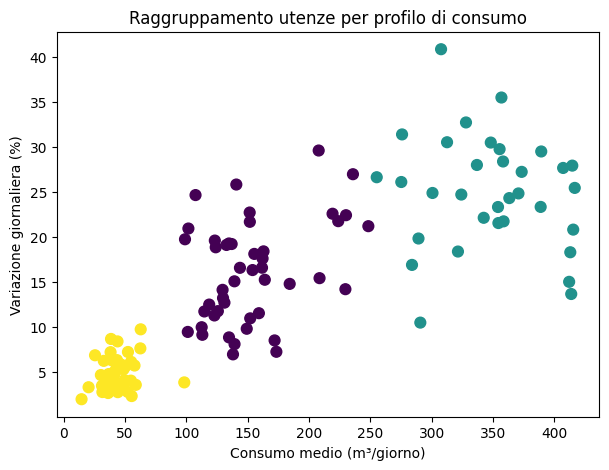

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

os.makedirs("data", exist_ok=True)
csv_path = "data/utenze_cluster.csv"

# --- Lettura o generazione dataset ---
if not os.path.exists(csv_path):
    np.random.seed(0)
    n_utenze = 120
    utenza_id = [f"U{str(i).zfill(3)}" for i in range(n_utenze)]

    consumo_medio = np.concatenate([
        np.random.normal(40, 10, 40),   # residenziali
        np.random.normal(150, 30, 40),  # commerciali
        np.random.normal(300, 60, 40)   # industriali
    ])
    variazione = np.concatenate([
        np.random.normal(5, 2, 40),
        np.random.normal(15, 5, 40),
        np.random.normal(25, 7, 40)
    ])
    pressione_media = np.random.normal(4.5, 0.3, n_utenze)

    df = pd.DataFrame({
        "utenza_id": utenza_id,
        "consumo_medio": consumo_medio,
        "variazione": variazione,
        "pressione_media": pressione_media
    })
    df.to_csv(csv_path, index=False)
else:
    df = pd.read_csv(csv_path)

print(df.head())

# --- Clustering ---
kmeans = KMeans(n_clusters=3, random_state=0)
df["cluster"] = kmeans.fit_predict(df[["consumo_medio", "variazione"]])

# --- Visualizzazione ---
plt.figure(figsize=(7,5))
plt.scatter(df["consumo_medio"], df["variazione"], c=df["cluster"], cmap="viridis", s=60)
plt.xlabel("Consumo medio (m³/giorno)")
plt.ylabel("Variazione giornaliera (%)")
plt.title("Raggruppamento utenze per profilo di consumo")
plt.show()